# Analyzing Spotify Data in Python
## Naim Sejtanic

In [ ]:
import pandas as pd
import matplotlib.pyplot as pplt
import seaborn as sb
 
pplt.xkcd()

In [ ]:
data_year = pd.read_csv("data_by_year.csv")
data_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


<AxesSubplot:>

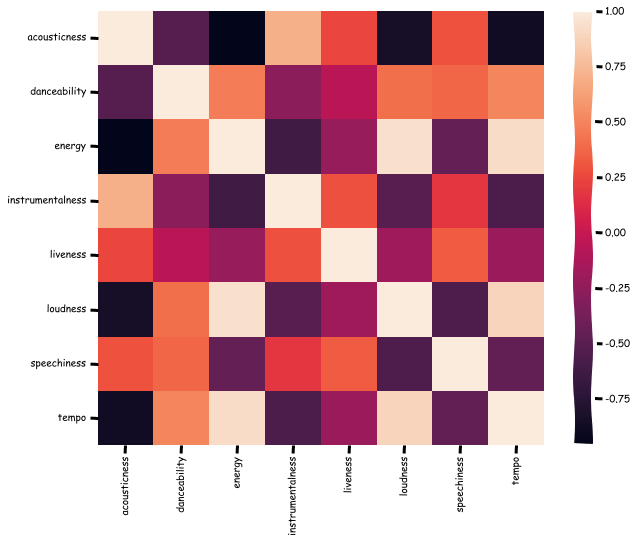

In [ ]:
corr_data = data_year[["acousticness","danceability","energy","instrumentalness","liveness","loudness","speechiness","tempo"]].corr()

fig,ax = pplt.subplots(figsize=(10, 8))
sb.heatmap(corr_data)


<AxesSubplot:xlabel='year', ylabel='loudness'>

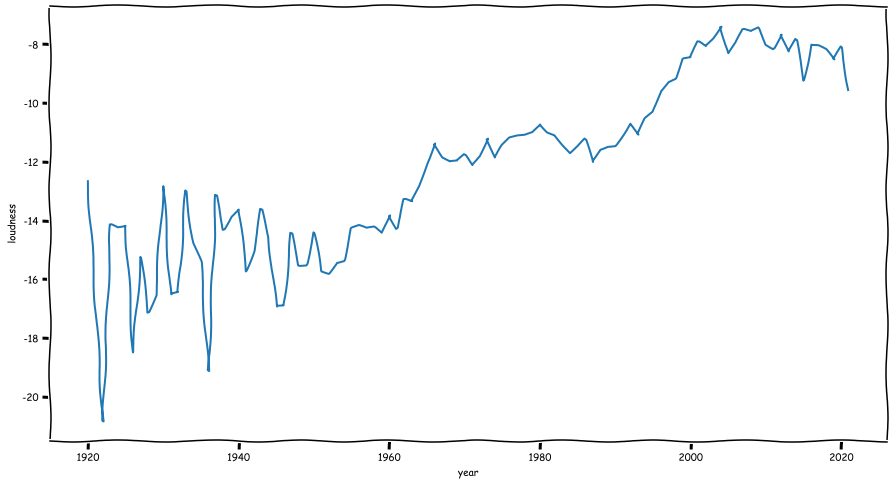

In [ ]:
fig,ax = pplt.subplots(figsize=(15,8))
sb.lineplot(x="year",y="loudness",data=data_year,ax=ax)

<AxesSubplot:xlabel='year', ylabel='tempo'>

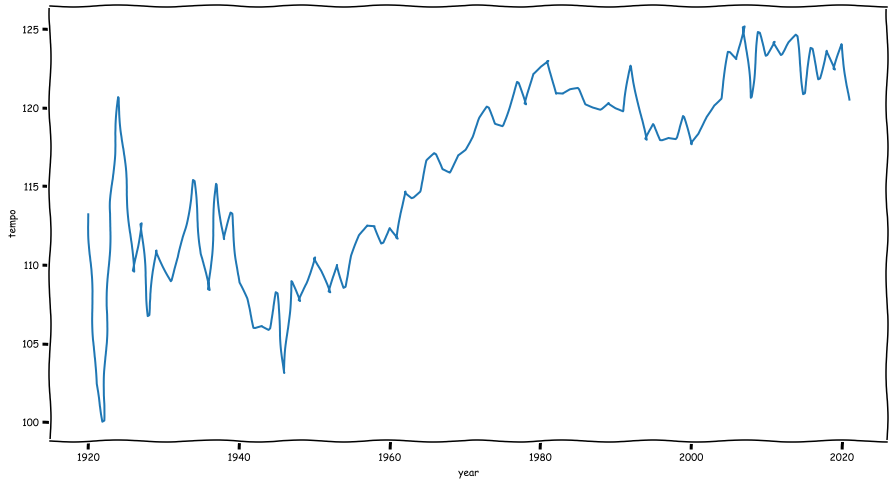

In [ ]:
fig,ax = pplt.subplots(figsize=(15,8))
sb.lineplot(x="year",y="tempo",data=data_year,ax=ax)

In [ ]:
data_genre = pd.read_csv("data_by_genres.csv")
data_genre["genres"]=[i.capitalize() for i in data_genre["genres"]]
data_genre[["genres","popularity"]].sort_values("popularity",ascending=False)[0:10]


,genres,popularity
565,Chinese electropop,79.000000
1768,Korean mask singer,78.000000
3213,Yaoi,77.000000
996,Dutch rap pop,77.000000
2544,Rochester mn indie,76.000000
945,Dong-yo,76.000000
44,Afroswing,75.333333
1616,J-rap,75.000000
1066,Estonian pop,75.000000
1539,Irish pop,74.625000


In [ ]:
data_genre[["genres","loudness"]].sort_values("loudness",ascending=False)[0:10]


,genres,loudness
1607,J-idol,-0.862000
912,Denpa-kei,-1.577000
2676,Seiyu,-1.577000
945,Dong-yo,-1.746000
2537,Rhythm game,-1.800500
1919,Metal catarinense,-1.894000
358,Brazilian black metal,-1.894000
1583,Italian pop,-1.957000
1814,Lexington ky indie,-2.168000
2955,Tekno,-2.366444


c:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Artist'), Text(0, 0.5, '# of songs')]

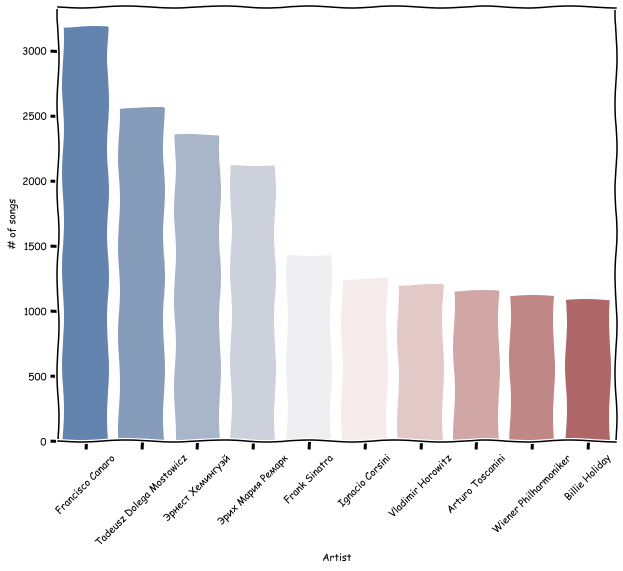

In [ ]:
data_artist=pd.read_csv("data_by_artist.csv")
artists_by_most_songs=data_artist[["artists","count"]].sort_values("count",ascending=False)[0:10]

pplt.figure(figsize=(10,8))
chart=sb.barplot("artists","count",data=artists_by_most_songs,palette="vlag")
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set(xlabel="Artist", ylabel="# of songs")


In [ ]:
data_artist[["artists","liveness"]].sort_values("liveness",ascending=False)[0:10]

,artists,liveness
26771,Stevie Ray Vaughan And Double Trouble with Jef...,0.986
15057,Karen Clark Sheard,0.985
29884,Toy Dolls,0.985
5543,Club Killers,0.981
23707,Ricardo Da Force,0.980
20207,N-Trance,0.980
32067,ryo (supercell),0.978
702,Alan Davey's Eclectic Devils,0.977
3143,Bill Engvall,0.977
5596,Col. Bruce Hampton & The Aquarium Rescue Unit,0.977


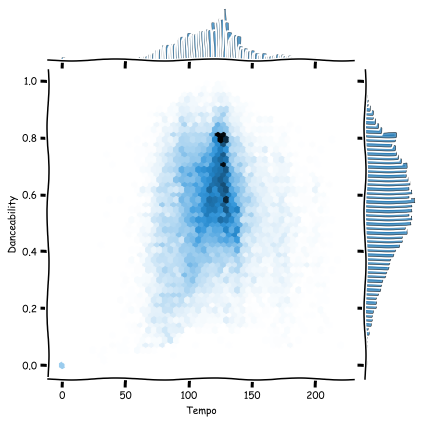

In [ ]:
sb.jointplot(x="tempo",y="danceability",data=data_artist[["tempo","danceability"]],kind="hex").set_axis_labels("Tempo","Danceability")